In [1]:
# Importing dependencies
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data into a Pandas DataFrame
natural_disaster_df = pd.read_excel('Resources/public_emdat_2004_to_2024.xlsx')
natural_disaster_df.head(10)

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,Country,Subregion,Region,Location,Origin,Associated Types,OFDA/BHA Response,Appeal,Declaration,AID Contribution ('000 US$),Magnitude,Magnitude Scale,Latitude,Longitude,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2004-0001-IDN,No,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,USGS:usp000cgss,NaN,IDN,Indonesia,South-eastern Asia,Asia,"Kota Mataram, Lombok Barat districts (Nusateng...",NaN,NaN,No,No,No,NaN,5.8,Moment Magnitude,-8.310,115.788,NaN,2004,1.0,1.0,2004,1.0,1.0,1.0,40.0,30000.0,NaN,30040.0,NaN,NaN,NaN,NaN,12000.0,19358.0,61.989586,"[{""adm2_code"":17974,""adm2_name"":""Karangasem""},...",2014-02-25,2023-09-25
1,2004-0004-ASM,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Heta,ASM,American Samoa,Polynesia,Oceania,American Samoa,NaN,NaN,No,No,Yes,NaN,310.0,Kph,NaN,NaN,NaN,2004,1.0,5.0,2004,1.0,5.0,NaN,60.0,20000.0,3000.0,23060.0,NaN,NaN,NaN,NaN,150000.0,241976.0,61.989586,"[{""adm1_code"":389,""adm1_name"":""Administrative ...",2005-07-28,2023-09-25
2,2004-0004-NIU,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Heta,NIU,Niue,Polynesia,Oceania,Alofi area (Niue province),NaN,NaN,No,No,No,NaN,300.0,Kph,NaN,NaN,NaN,2004,1.0,6.0,2004,1.0,6.0,1.0,2.0,200.0,500.0,702.0,NaN,NaN,NaN,NaN,40000.0,64527.0,61.989586,"[{""adm1_code"":2241,""adm1_name"":""Administrative...",2004-01-08,2023-09-25
3,2004-0004-TON,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Heta,TON,Tonga,Polynesia,Oceania,"Tafahi, Nuiatoputapu islands (Tonga province)",NaN,NaN,No,No,No,NaN,NaN,Kph,NaN,NaN,NaN,2004,1.0,6.0,2004,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.989586,"[{""adm1_code"":2976,""adm1_name"":""Administrative...",2004-01-13,2023-09-25
4,2004-0004-WSM,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Heta,WSM,Samoa,Polynesia,Oceania,"Savaii, Upolu islands (Samoa province)",NaN,Flood|Surge,No,No,Yes,NaN,310.0,Kph,NaN,NaN,NaN,2004,1.0,5.0,2004,1.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.989586,"[{""adm1_code"":2618,""adm1_name"":""Administrative...",2004-01-16,2023-09-25
5,2004-0006-BDI,No,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,NaN,BDI,Burundi,Sub-Saharan Africa,Africa,Mpanda district (Bubanza province),NaN,NaN,No,No,No,NaN,NaN,Kph,NaN,NaN,NaN,2004,1.0,4.0,2004,1.0,4.0,NaN,NaN,NaN,500.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,61.989586,"[{""adm2_code"":40561,""adm2_name"":""Mpanda""}]",2004-01-07,2023-09-25
6,2004-0010-TUR,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,TUR,Türkiye,Western Asia,Asia,"Aragpir city (Malatya province), Istanbul, Ank...",NaN,Snow/ice,No,No,No,NaN,-22.0,°C,NaN,NaN,NaN,2004,1.0,9.0,2004,1.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.989586,"[{""adm1_code"":3023,""adm1_name"":""Ankara""},{""adm...",2004-01-12,2023-09-25
7,2004-0011-DZA,No,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,USGS:usp000chm5,NaN,DZA,Algeria,Northern Africa,Africa,"Alger, Boumerdes provinces",NaN,NaN,No,No,No,NaN,4.5,Moment Magnitude,36.852,3.418,NaN,2004,1.0,10.0,2004,1.0,10.0,NaN,300.0,NaN,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,61.989586,"[{""adm1_code"":344,""adm1_name"":""Alger""},{""adm1_...",2014-03-26,2023-09-25
8,2004-0012-IRN,No,nat-hyd-flo-fla,Natural,Hydrological,Flood,Flash flood,NaN,NaN,IRN,Iran (Islamic Republic of),Southern Asia,Asia,"Firuzabad, Lamerd, Darab, Abadeh, Bavanat, Mam...",Heavy rains,Broken Dam/Burst bank,No,No,No,NaN,NaN,Km2,NaN,NaN,NaN,2004,1.0,10.0,2004,1.0,19.0,6.0,10.0,NaN,NaN

In [19]:
region_summary_df = natural_disaster_df.groupby('Region')[['Total Deaths', 'No. Homeless']].sum().reset_index()
print(region_summary_df)

     Region  Total Deaths  No. Homeless
0    Africa       69827.0     3356372.0
1  Americas      265152.0     2424502.0
2      Asia      789040.0    26504317.0
3    Europe      190924.0      794624.0
4   Oceania        2303.0       62727.0


C:\Users\Owner\AppData\Local\Temp\ipykernel_4800\758543261.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=natural_disaster_df, x='Disaster Type', y='Total Deaths', palette='viridis')


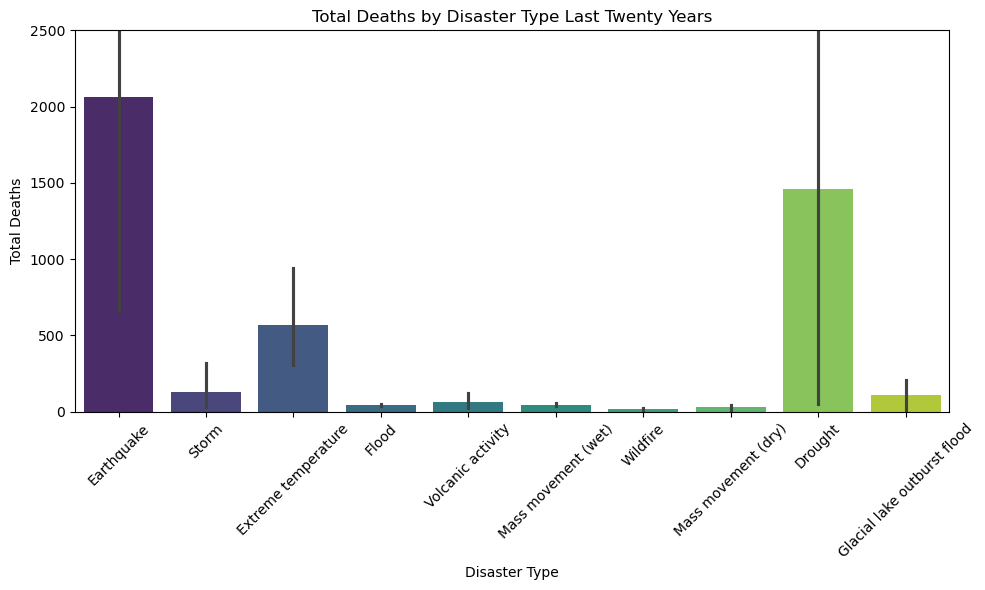

In [3]:
plt.figure(figsize=(10, 6))
sns.barplot(data=natural_disaster_df, x='Disaster Type', y='Total Deaths', palette='viridis')
plt.title('Total Deaths by Disaster Type Last Twenty Years')
plt.xlabel('Disaster Type')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.ylim(0, 2500)  
plt.tight_layout()
plt.show()

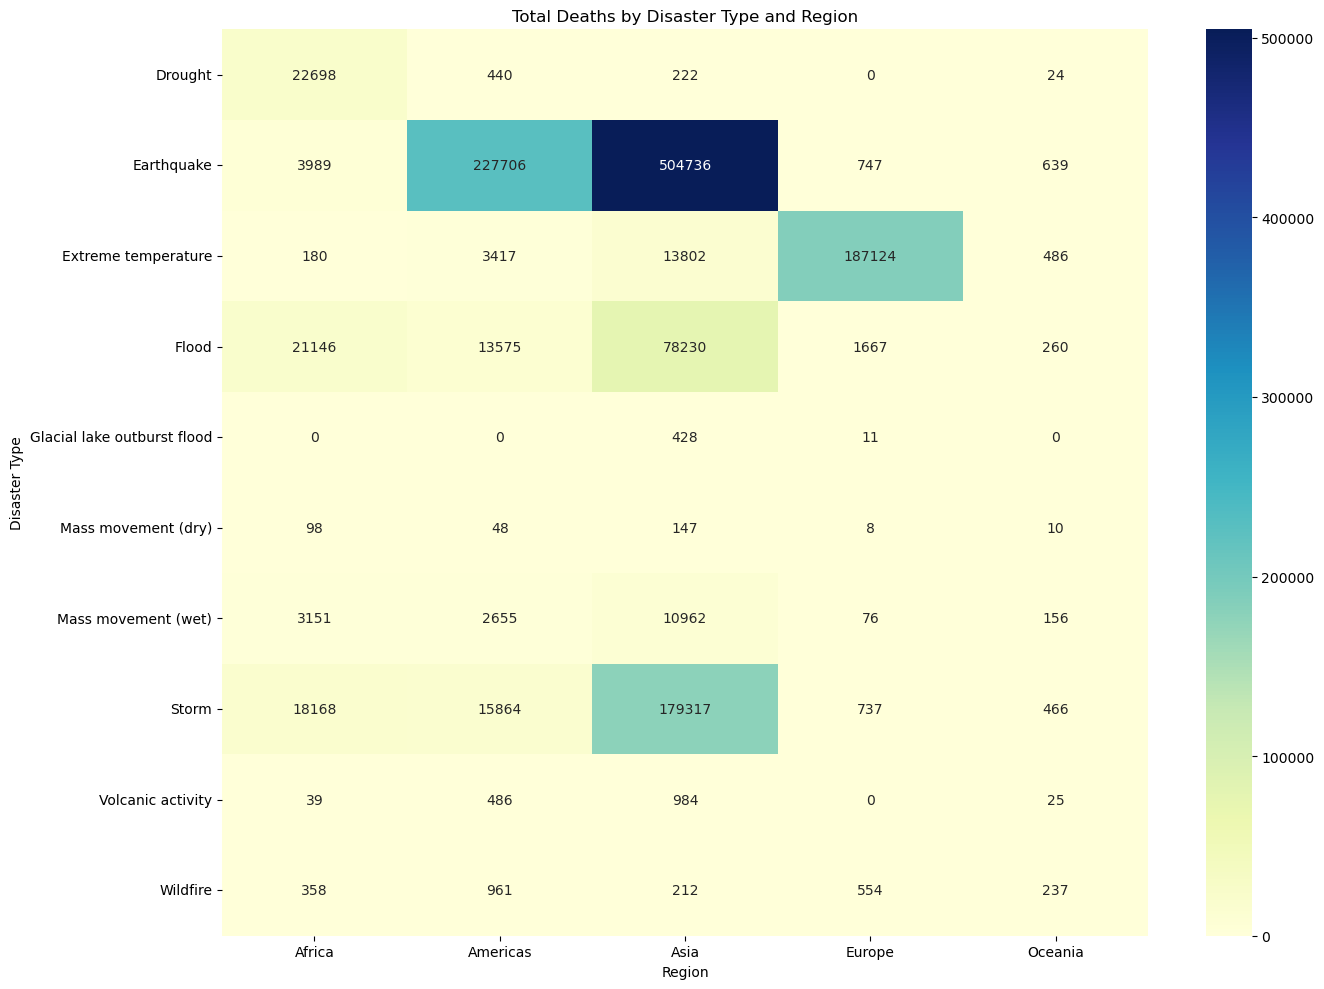

In [4]:
pivot_table = natural_disaster_df.pivot_table(index='Disaster Type', columns='Region', values='Total Deaths', aggfunc='sum', fill_value=0)
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Total Deaths by Disaster Type and Region')
plt.xlabel('Region')
plt.ylabel('Disaster Type')
plt.tight_layout()
plt.show()

In [14]:
df_cleaned = natural_disaster_df.dropna(subset=[lat_col, lon_col])

In [16]:
import csv
import json

def csv_to_geojson(csv_file, geojson_file, lat_col, lon_col):
    """Converts a CSV file to GeoJSON format."""
    features = []
    with open(csv_file, 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            
            try:
                lat = float(row[lat_col])
                lon = float(row[lon_col])
            except (ValueError, TypeError):
                
                continue

            feature = {
                "type": "Feature",
                "geometry": {
                    "type": "Point",
                    "coordinates": [lon, lat]
                },
                "properties": row
            }
            features.append(feature)

    geojson = {
        "type": "FeatureCollection",
        "features": features
    }

    # Write the GeoJSON data to a file
    with open(geojson_file, 'w') as f:
        json.dump(geojson, f, indent=4)

if __name__ == "__main__":
    csv_file = "Resources/public_emdat_2004_to_2024.csv"  # Replace with your CSV file path
    geojson_file = "output.geojson"  # Replace with desired output file name
    lat_col = "Latitude"  # Replace with the column name for latitude
    lon_col = "Longitude"  # Replace with the column name for longitude
    csv_to_geojson(csv_file, geojson_file, lat_col, lon_col)

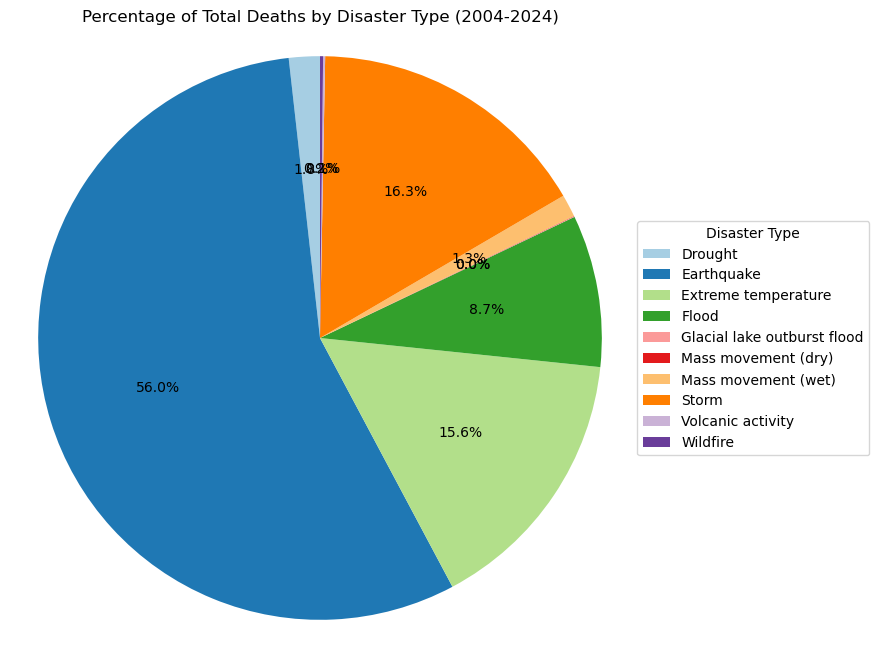

In [46]:


# Group the data by 'Disaster Type' and sum the 'Total Deaths'
disaster_deaths = natural_disaster_df.groupby('Disaster Type')['Total Deaths'].sum()

# Plot a pie chart using Matplotlib
plt.figure(figsize=(8, 8))  # Set the figure size
wedges, texts, autotexts = plt.pie(disaster_deaths, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Percentage of Total Deaths by Disaster Type (2004-2024)')

# Ensure that the pie chart is a circle
plt.axis('equal')

# Add a legend with the disaster types
plt.legend(wedges, disaster_deaths.index, title="Disaster Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.show()

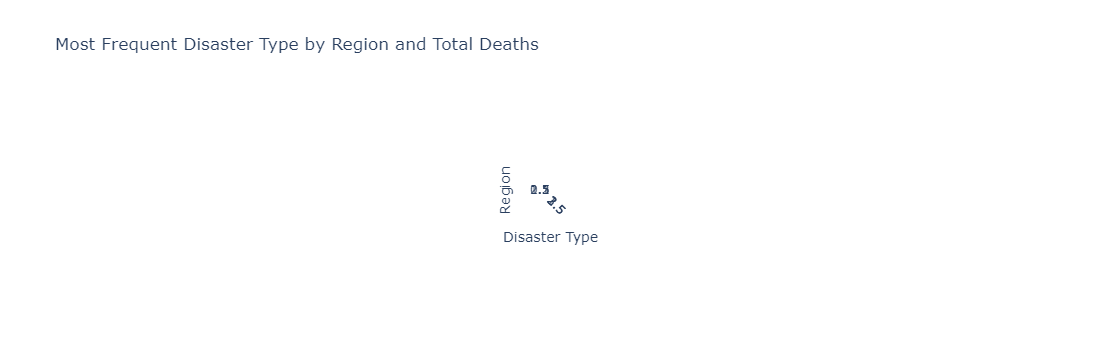

In [41]:

heatmap_values = heatmap_values.fillna(0)

fig = px.imshow(
    heatmap_values, 
    labels=dict(x="Disaster Type", y="Region", color="Total Deaths"),
    title="Most Frequent Disaster Type by Region and Total Deaths",
    color_continuous_scale="Reds"
)



fig.update_xaxes(tickangle=45)  
fig.update_yaxes(tickangle=0)   


fig.show()

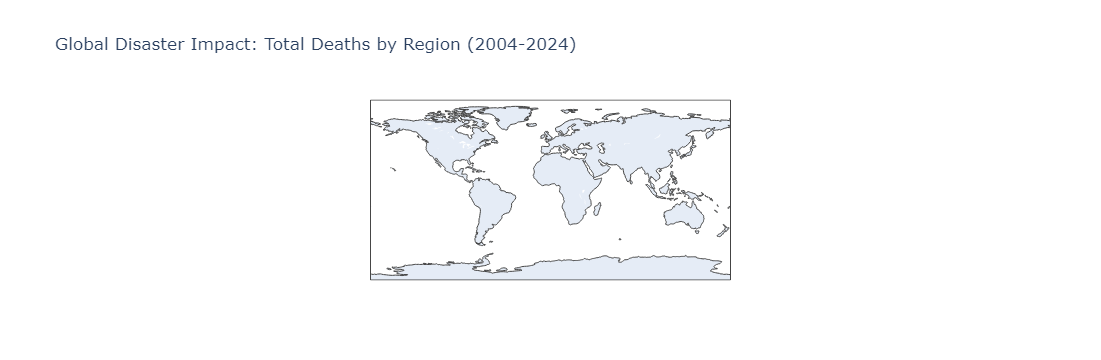

In [30]:
import plotly.express as px


fig = px.choropleth(
    data_frame=natural_disaster_df,
    locations='Region',  
    locationmode='country names',  
    color='Total Deaths',  
    hover_name='Region',  
    hover_data={
        'Disaster Type': True, 
        'Total Deaths': True,   
        'Total Affected': True  
    },
    color_continuous_scale='Reds',  
    title='Global Disaster Impact: Total Deaths by Region (2004-2024)'
)


fig.show()


In [25]:
natural_disaster_df.dropna(inplace=True)


In [26]:
df_filtered = natural_disaster_df[natural_disaster_df['Disaster Type'] == 'Flood']

In [27]:
natural_disaster_df = df.drop(columns=['Admin Units', 'Historic', 'Disaster Group', 'Disaster Subgroup', 'External Ids', 'Event Name', 'ISO', 'Location', 'Origin', ], errors='ignore')

NameError: name 'df' is not defined